# Submission 1 MLT - Prediksi Risiko Penyakit Stroke

https://www.dicoding.com/users/atthaariq

## Load Dataset

Download *dataset* dari *kaggle* dengan opendatasets.

In [1]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset")

Skipping, found downloaded files in ".\full-filled-brain-stroke-dataset" (use force=True to force download)


In [2]:
import time
start = time.time()

Melihat 5 data pertama dengan `head()`

In [3]:
import pandas as pd

df = pd.read_csv('full-filled-brain-stroke-dataset/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Output menunjukkan bahwa data berhasil di-*load*.

## Data Understanding & Analysis (EDA)
Melihat berapa banyak kolom dan jumlah baris (data).

In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Dengan `.shape`, terdapat 11 kolom (variabel) dan 4981 baris (data).
Variabel target prediksi adalah `stroke`.

In [6]:
#info kolom data numerik
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Terdapat 6 kolom data numerik. 3 kolom merupakan data numerik kontinyu, yaitu `age`, `avg_glucose_level`, dan `bmi`. Kolom lainnya yaitu `hypertension`, `heart_disease`, dan `stroke` merupakan kolom data numerik diskrit yang bernilai biner (0 atau 1).

In [7]:
# info kolom data kategorik
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['ever_married'].unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


Pada 5 kolom lainnya, 2 kolom (`work_type` & `smoking_status`) merupakan kolom data kategorikal. 3 kolom lainnya (`gender`, `Residence_type`, & `ever_married`) merupakan kolom data kategorikal biner.

In [8]:
#apakah ada kolom duplikat
df[df.duplicated()].shape

(0, 11)

Dengan pengecekan duplikasi kolom menggunakan `duplicated()`, ternyata tidak ada kolom yang duplikat.

Impor semua *library* untuk keperluan visualisasi data.

In [9]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [10]:
df.isnull().sum() #cek apakah ada nilai Null

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data dicek apakah terdapat nilai null didalamnya. Ternyata tidak ada nilai null.

In [11]:
df.nunique() # jumlah data yang unik

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

- Pengecekan keragaman data dengan `nunique()` menunjukkan bahwa terdapat 3 kolom (`age`, `avg_glucose_level`, dan `bmi`) yang memiliki keragaman data yang cukup banyak.
- Kemudian 2 kolom (`Residence_type` dan `smoking_status`) dengan 4 keragaman data.
- Lalu 6 kolom lainnya memiliki 2 keragaman data.

<AxesSubplot:>

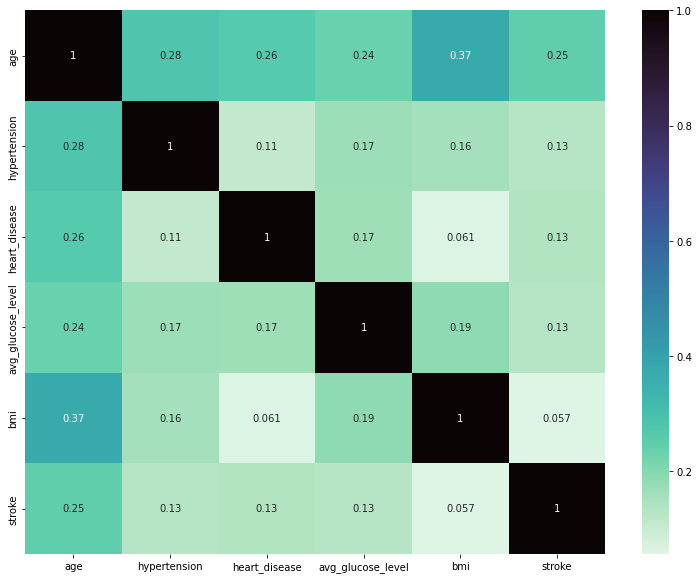

In [12]:
# melihat korelasi dengan heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot = True,cmap = 'mako_r')

Korelasi antar kolom dilihat dengan *heatmap*. Diantara semua kolom, hanya `bmi` yang memiliki korelasi yang cukup tinggi, yaitu 0.37. Kolom lainnya menunjukkan korelasi yang lebih kecil.

gender
Female    140
Male      108
Name: stroke, dtype: int64


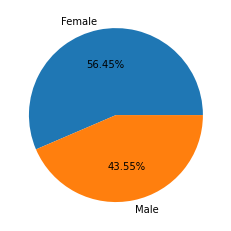

In [13]:
# perbandingan penderita stroke dari gender
gender = df.groupby(df['gender'])['stroke'].sum()
print(gender)
plt.pie(gender, labels=['Female','Male'], autopct='%.2f%%')
plt.show()

Dengan melihat rasio data penderita stroke antara pria dan wanita, dapat dilihat bahwa rasio data wanita penderita stroke lebih banyak dari pria.

0    4733
1     248
Name: stroke, dtype: int64


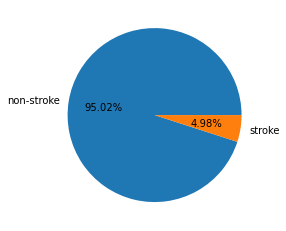

In [14]:
# perbandingan jumlah non-stroke dan stroke dalam dataset
stroke = df['stroke'].value_counts()
print(stroke)
plt.pie(stroke, labels=['non-stroke','stroke'], autopct='%.2f%%')
plt.show()

*Dataset* ini memiliki data yang tidak seimbang karena rasio data non-stroke dan penderita stroke sangat besar, nyaris 19:1.

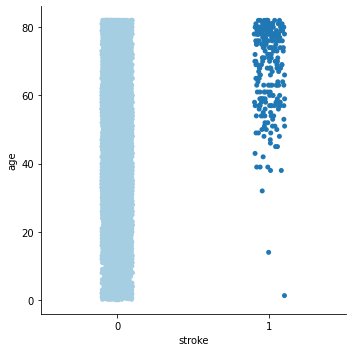

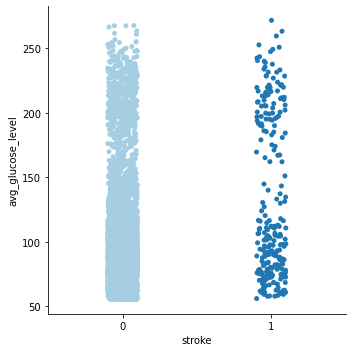

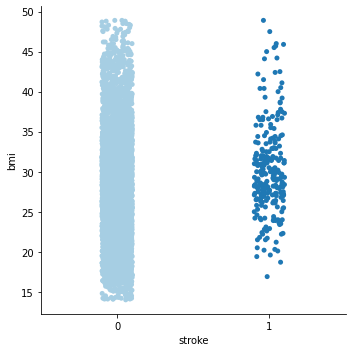

In [15]:
# distribusi penderita stroke dari 3 data numerik
columns = ['age', 'avg_glucose_level', 'bmi']

for i in range(len(columns)):
    sns.catplot(x ='stroke', y = columns[i], palette = "Paired", data = df)

Pada 3 kolom data numerik kontinyu, data di plot untuk melihat distribusi data penderita stroke pada rentang data tersebut.
Terlihat bahwa penderita stroke pada kolom `age` menumpuk pada usia 60-80 tahun.
Pada kolom `avg_glucose_level`, distribusi penderita stroke cenderung menyebar, bahkan sedikit menumpuk pada kadar gula yang rendah.
Pada kolom `bmi`, distribusi penderita stroke sedikit menumpuk pada nilai 30 dan cenderung menyebar.

In [16]:
# cek perbandingan penderita stroke
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

Pengecekan jumlah data stroke menunjukkan bahwa data penderita stroke hanya berjumlah 248 orang dari keseluruhan data.

In [17]:
from sklearn.preprocessing import LabelEncoder

# encode data kategorikal ke dalam 
le = LabelEncoder()
cat = ['gender','ever_married','work_type','smoking_status','Residence_type']
for i in cat:
    df[i] = le.fit_transform(df[i])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


Kolom kategorikal akan di-`encode` menjadi data numerik. Hasilnya adalah 2 kolom yaitu `Residence_type` dan `smoking_status` akan memiliki 4 nilai (0,1,2, & 3).
Sedangkan kolom lainnya akan memiliki nilai biner 0 dan 1.

In [18]:
#slicing data
# x=df.iloc[:,:-1].values
# y=df.iloc[:,-1].values
# print(x)
# print(y)

Data akan dibagi menjadi input `X` berisi semua kolom data kecuali kolom `stroke` dan data output `y` yaitu variabel prediksi / target berisi data `stroke`.

In [19]:
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]
print(X)
print(y)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

In [20]:
column_names = list(df.columns.values)
column_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

Membuat variabel *dummy* menggunakan 10 kolom data (kecuali kolom `stroke`).

In [21]:
X = pd.get_dummies(X[column_names[:-1]])
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


0    4733
1     248
Name: stroke, dtype: int64


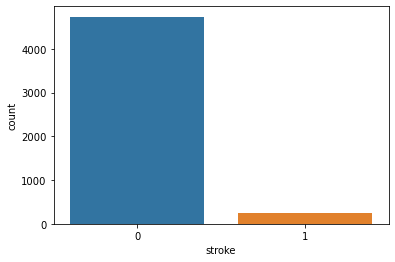

In [22]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

Data yang tidak seimbang atau *imbalanced* harus diseimbangkan dahulu (*resampled*) agar pemodelan dapat berjalan dengan baik. Untuk mengatasi hal ini, digunakan teknik *oversampling* atau memperbanyak data dengan teknik SMOTE.

In [23]:
#oversampling dengan SMOTE
from imblearn.over_sampling import SMOTE


smote = SMOTE()
X, y = smote.fit_resample(X, y)

1    4733
0    4733
Name: stroke, dtype: int64


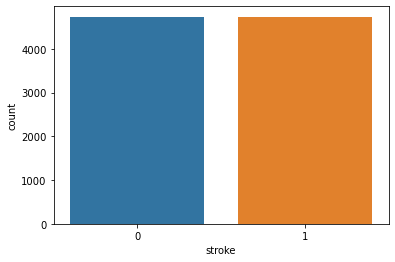

In [24]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

Hasil *resampled* dengan SMOTE menunjukkan bahwa data penderita stroke dan non-stroke telah seimbang yaitu 4733 data.

Setelah data seimbang, selanjutnya data akan distandarisasi karena model ML lebih cepat konvergen dengan data yang sama skalanya.
Standarisasi dilakukan menggunakan `MinMaxScaler` karena data yang dihasilkan memiliki rentang antara 0 dan 1. Ini membuat komputasi lebih cepat.

In [25]:
#normalisasi dengan MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled = mm.fit_transform(X)
x_scaled

array([[1.        , 0.81689453, 0.        , ..., 0.80126489, 0.64756447,
        0.33333333],
       [1.        , 0.97558594, 0.        , ..., 0.23451205, 0.53008596,
        0.66666667],
       [0.        , 0.59716797, 0.        , ..., 0.53600776, 0.58452722,
        1.        ],
       ...,
       [0.        , 0.78789381, 0.        , ..., 0.70208155, 0.78102948,
        0.        ],
       [0.        , 0.84929768, 0.        , ..., 0.12624137, 0.40958481,
        0.66666667],
       [0.        , 0.95442096, 0.        , ..., 0.24871922, 0.48785789,
        0.66666667]])

## Pemodelan


- Data dibagi dengan rasio *train* : *test* yaitu 80:20.
- Pemberian paramter `random_state`= 100

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2, random_state=100)

Model *Logistic Regression* dengan `LogisticRegression()` dibuat dengan parameter:
- solver: "liblinear", yaitu algoritma *solver* dari LIBLINEAR

Kemudian model akan di-*fit* menggunakan data *training* `x_train` dan `y_train`.

In [27]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(solver="liblinear")
LR=LR.fit(x_train,y_train)
LR

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

Model *SUpport Vector Machine* dengan `SVC()` dibuat dengan parameter:
- kernel: "rbf", yaitu teknik SVM yang menggunakan kernel *Radial Basis Function* (RBF)
- random_state: 3, yaitu pemilihan inisialisasi *random number generator* dengan nilai 3

Setelah itu model di-*fit* juga dengan data *training*.

In [28]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

SVM=SVC(kernel="rbf",random_state=3)
SVM=SVM.fit(x_train,y_train)
SVM

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=3)

### Training & Test
Hasil pelatihan tersebut akan diuji oleh input `x_test` dengan `predict()`, menghasilkan prediksi pada model LR dan SVM yang disimpan dalam `y_pred_LR` dan `y_pred_SVM`.

In [29]:
# prediction data LR
y_pred_LR=LR.predict(x_test)
y_pred_LR

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
# prediction data SVM
y_pred_SVM=SVM.predict(x_test)
y_pred_SVM

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

## Metrik Evaluasi

Hasil prediksi `y_pred_LR` dan `y_pred_SVM` dibandingkan dengan *ground truth* yaitu `y_test` untuk melihat mana prediksi yang benar dan salah. 

### Confusion Matrix
Prediksi *True Positive* (TP), *True Negative* (TN), *False Positive* (FP), dan *False Negative* (FN) akan dilihat menggunakan *Confusion Matrix*.

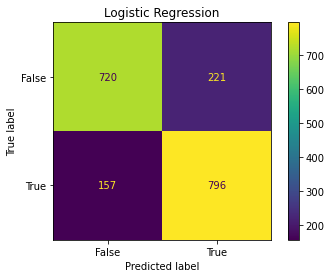

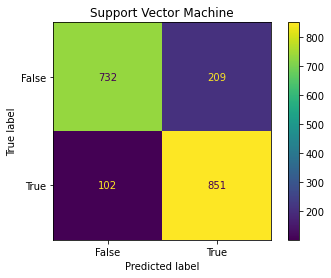

In [31]:
from sklearn import metrics

lr_cm = metrics.confusion_matrix(y_test,y_pred_LR)
svm_cm = metrics.confusion_matrix(y_test,y_pred_SVM)
lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = [False, True])
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm, display_labels = [False, True])

lr_cm_display.plot()
plt.title('Logistic Regression')
svm_cm_display.plot()
plt.title('Support Vector Machine')
plt.show()

### Accuracy, precision, recall, & f1-score

Nilai TP, TN, FP, dan FN dipakai untuk menghitung 4 metrik evaluasi yang digunakan pada 2 model ini, yaitu:

$$accuracy = \frac{TP + TN}{TP + FN + TN + FP}$$

$$precision = \frac{TP}{TP + FP}$$

$$recall = \frac{TP}{TP + FN}$$

$$F1 = \frac{2 \times precision \times recall}{precision + recall}$$


In [32]:
print('Logistic Regression:\n', metrics.classification_report(y_test,y_pred_LR))
print('Support Vector Machine:\n', metrics.classification_report(y_test,y_pred_SVM))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       941
           1       0.78      0.84      0.81       953

    accuracy                           0.80      1894
   macro avg       0.80      0.80      0.80      1894
weighted avg       0.80      0.80      0.80      1894

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82       941
           1       0.80      0.89      0.85       953

    accuracy                           0.84      1894
   macro avg       0.84      0.84      0.84      1894
weighted avg       0.84      0.84      0.84      1894



Nilai akurasi pada proses *training* dan *test* juga dapat dilihat dari 2 model ini.

In [33]:
#LR
print('Logistic Regression')
print("Training Acuracy",LR.score(x_train,y_train))
print("Test Acuracy",LR.score(x_test,y_test))

#SVM
print('SVM')
print("Training Acuracy",SVM.score(x_train,y_train))
print("Test Acuracy",SVM.score(x_test,y_test))

Logistic Regression
Training Acuracy 0.8083729529846804
Test Acuracy 0.8004223864836325
SVM
Training Acuracy 0.8507659799260433
Test Acuracy 0.8357972544878564


Jika kita ingin melihat akurasi yang dipakai untuk membandingkan kedua model, akurasi yang dipakai adalah akurasi pada *test*.

In [34]:
from sklearn.metrics import accuracy_score

print('Akurasi Logit:', round(accuracy_score(y_test,y_pred_LR)*100, 2))
print('AKurasi SVM:', round(accuracy_score(y_test,y_pred_SVM)*100, 2))

Akurasi Logit: 80.04
AKurasi SVM: 83.58


### ROC
*Receiver Operating Characteristic* juga dipakai untuk melihat performa kedua model ini. ROC dilihat dengan grafis menggunakan `RocCurveDisplay()`.

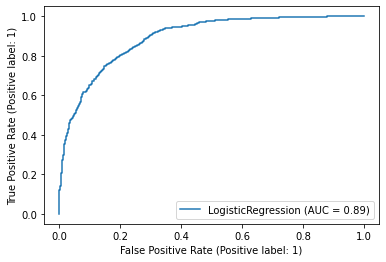

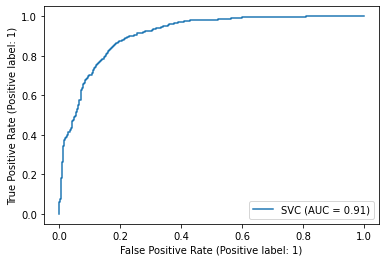

In [35]:
metrics.RocCurveDisplay.from_estimator(LR, x_test, y_test)
metrics.RocCurveDisplay.from_estimator(SVM, x_test, y_test)
plt.show()

In [36]:
end = time.time()
print(end - start)

25.354926586151123


*tambahan:

*accuracy*, *precision*, *recall*, dan *f1-score* dapat ditampilkan dalam bentuk DataFrame agar mudah dilihat.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
result = {'model':['Logistic Regression', 'Support Vector Machine'],
          'accuracy':[accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_SVM)],
          'precision':[precision_score(y_test, y_pred_LR), precision_score(y_test, y_pred_SVM)],
          'recall':[recall_score(y_test, y_pred_LR), recall_score(y_test, y_pred_SVM)],
          'f1-score':[f1_score(y_test, y_pred_LR), f1_score(y_test, y_pred_SVM)]}

result = pd.DataFrame(result)
result

,model,accuracy,precision,recall,f1-score
0,Logistic Regression,0.800422,0.782694,0.835257,0.808122
1,Support Vector Machine,0.835797,0.802830,0.892970,0.845504
